DIABETICS PREDICTION MODEL

The objective of this project is to develop a machine learning model that predicts a person's 
diabetes status (healthy, pre-diabetic, or diabetic) based on their demographics, lab test 
results, and lifestyle survey responses. 

The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey 
information to classify individuals as diabetic, pre-diabetic, or healthy. It includes 253,680 
instances and 21 features covering demographics, medical history, lifestyle habits, and 
healthcare access. 

 Dataset link : https://drive.google.com/drive/folders/1QBuiVLEiZnrKraBctHZ7KuC2LJol67Zb?usp=sharing

FEATURES 

1. HighBP – Indicates if the person has high blood pressure 
2. HighChol – Indicates if the person has high cholesterol 
3. CholCheck – Whether cholesterol was checked in the past 5 years 
4. BMI – Body Mass Index (numerical value) 
5. Smoker – Whether the person is a smoker 
6. Stroke – History of stroke (Yes/No) 
7. HeartDiseaseorAttack – History of heart disease or heart attack 
8. PhysActivity – Whether the person engages in physical activity 
9. Fruits – Whether the person consumes fruits regularly 
10. Veggies – Whether the person consumes vegetables regularly 
11. HvyAlcoholConsump – Heavy alcohol consumption status 
12. AnyHealthcare – Whether the person has access to healthcare services 
13. NoDocbcCost – Whether the person couldn't see a doctor due to cost 
14. GenHlth – Self-reported general health status (categorical) 
15. MentHlth – Number of mentally unhealthy days in the past 30 days 
16. PhysHlth – Number of physically unhealthy days in the past 30 days 
17. DiffWalk – Whether the person has difficulty walking due to health reasons 
18. Sex – Gender of the individual 
19. Age – Age group (bucketed) 
20. Education – Education level of the individual 
21. Income – Income level of the individual 
22. Diabetes_binary – Target variable: 0 (No diabetes) or 1 (Diabetes) 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler


In [2]:
# Load the dataset
print("Loading dataset...")
df = pd.read_csv("cdc_diabetes_health_indicators.csv")
print(df.head())


Loading dataset...
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        

In [3]:
# Data Summary
print("Dataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth            

In [4]:
print("\nDataset Description:")
print(df.describe())


Dataset Description:
              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              0.0

In [5]:
# Handling Duplicates
df = df.drop_duplicates()
print(f"\nDuplicates Removed, New Shape: {df.shape}")


Duplicates Removed, New Shape: (229474, 22)


In [6]:
# Categorizing Categorical Columns
categorical_columns = ['Sex', 'Education', 'Income', 'HighBP', 'HighChol', 'CholCheck',
                       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
                       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                       'NoDocbcCost', 'DiffWalk']
df[categorical_columns] = df[categorical_columns].astype('category')

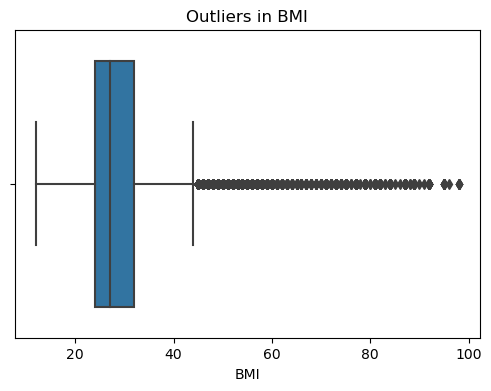

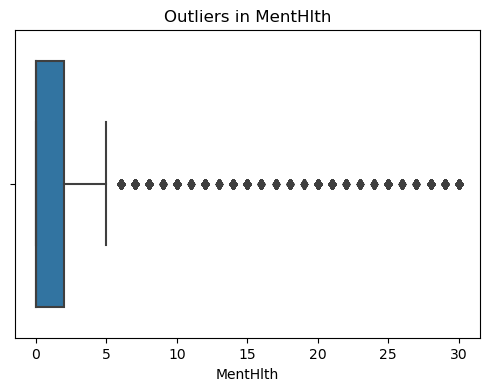

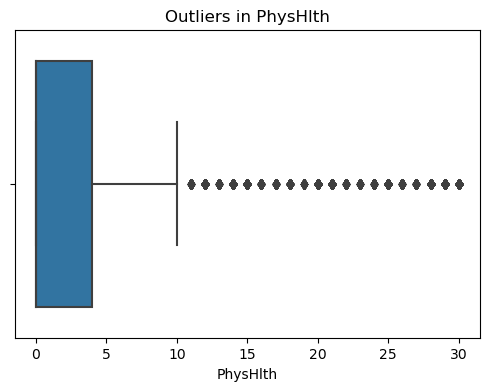

In [7]:
# Boxplots for Numeric Columns
numeric_columns = ['BMI', 'MentHlth', 'PhysHlth']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [8]:
# Handling Outliers using IQR Method
numeric_columns = ['BMI', 'MentHlth', 'PhysHlth']
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

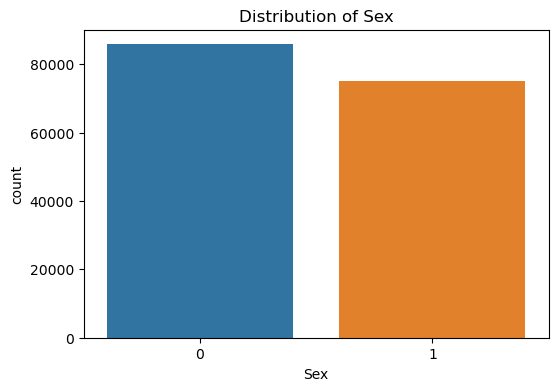

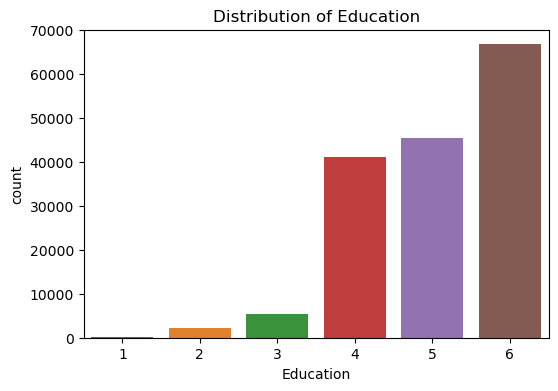

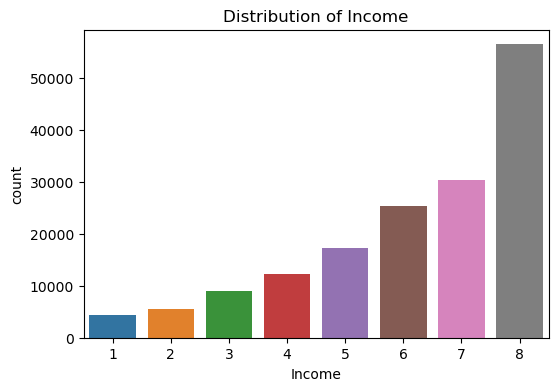

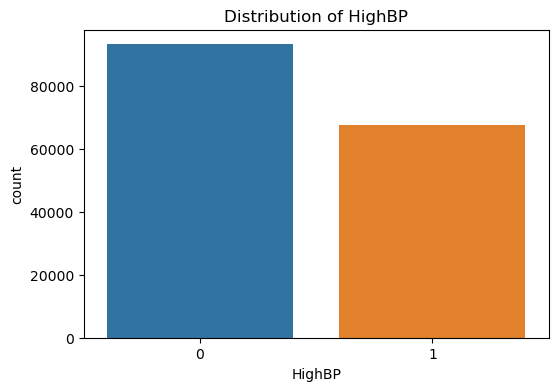

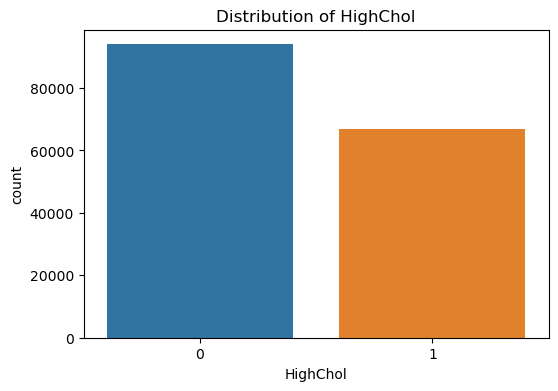

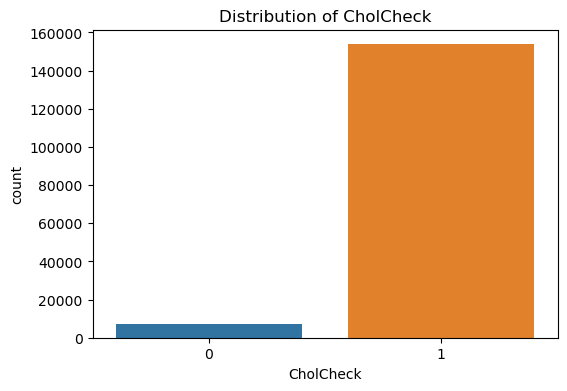

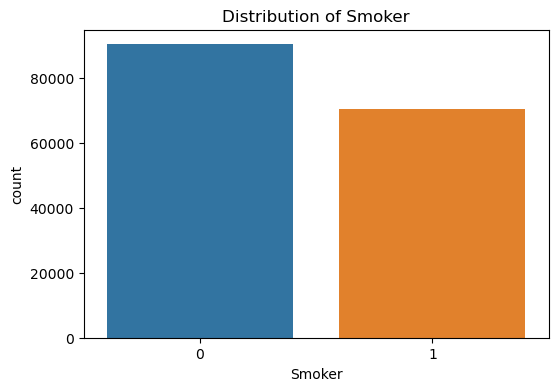

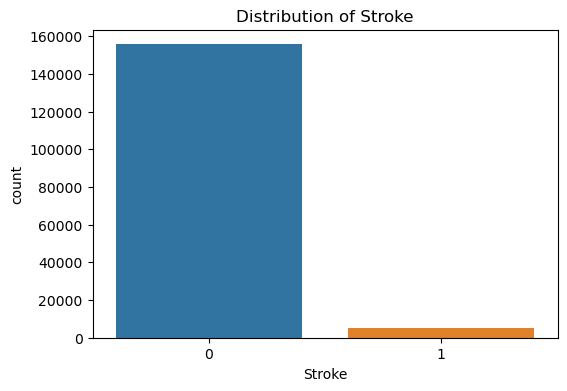

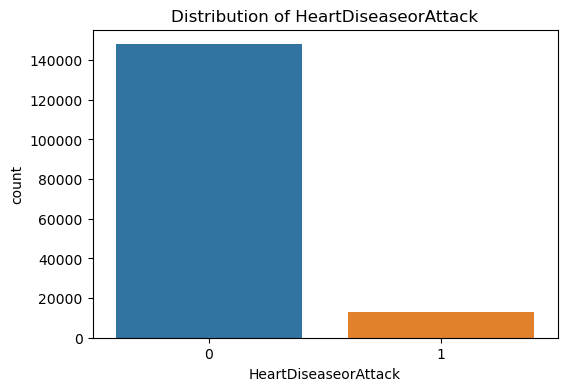

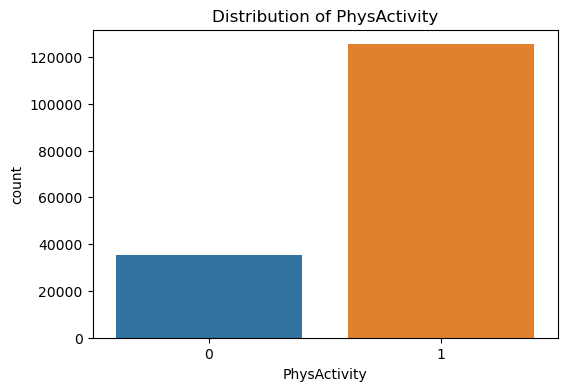

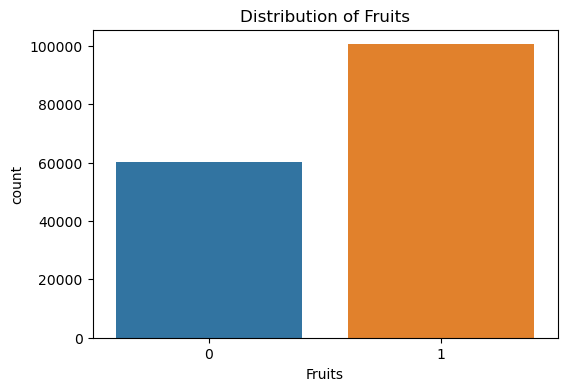

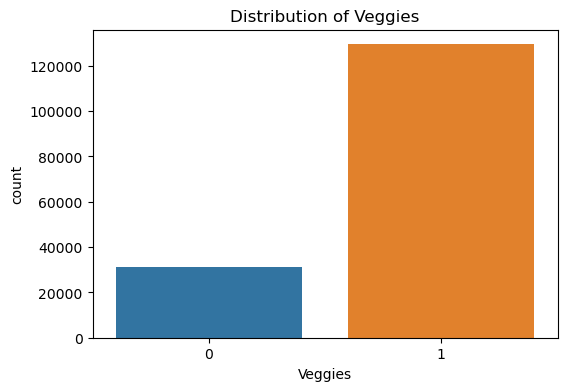

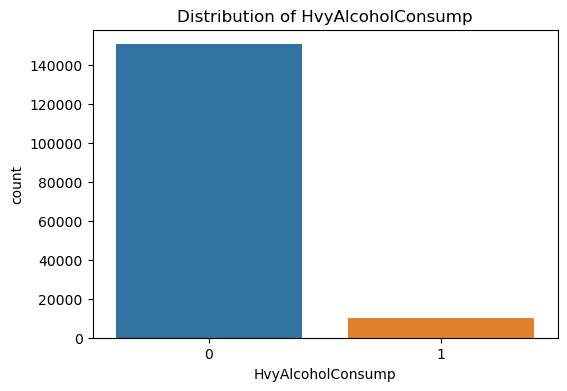

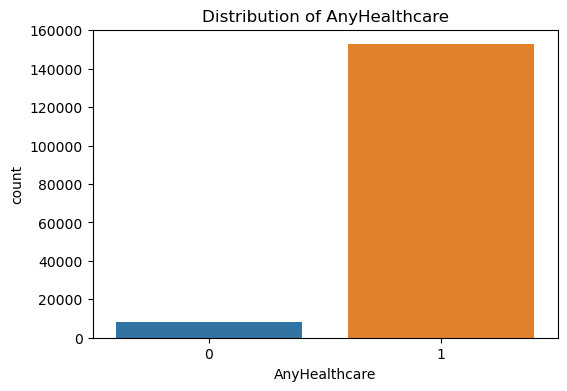

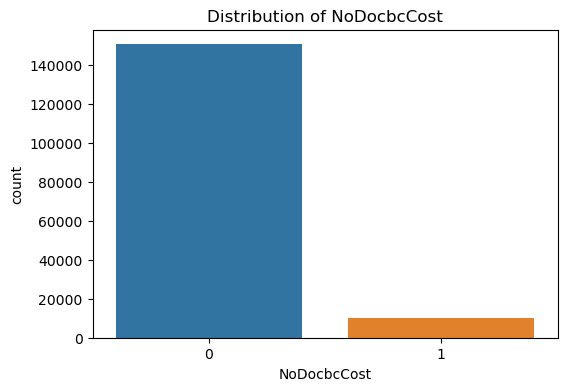

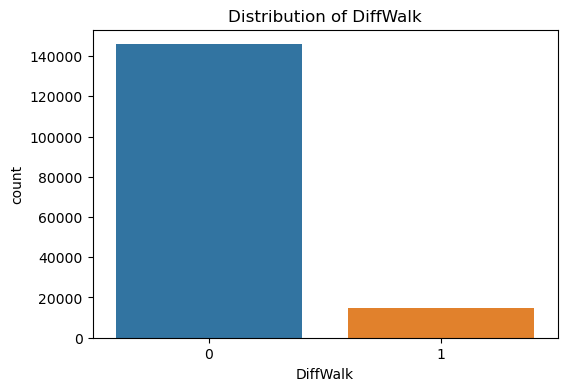

In [9]:
# Visualization - Distribution of Categorical Features
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()



In [10]:
# Encoding Categorical Variables
df_encoded = df.copy()
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(lambda x: x.cat.codes)

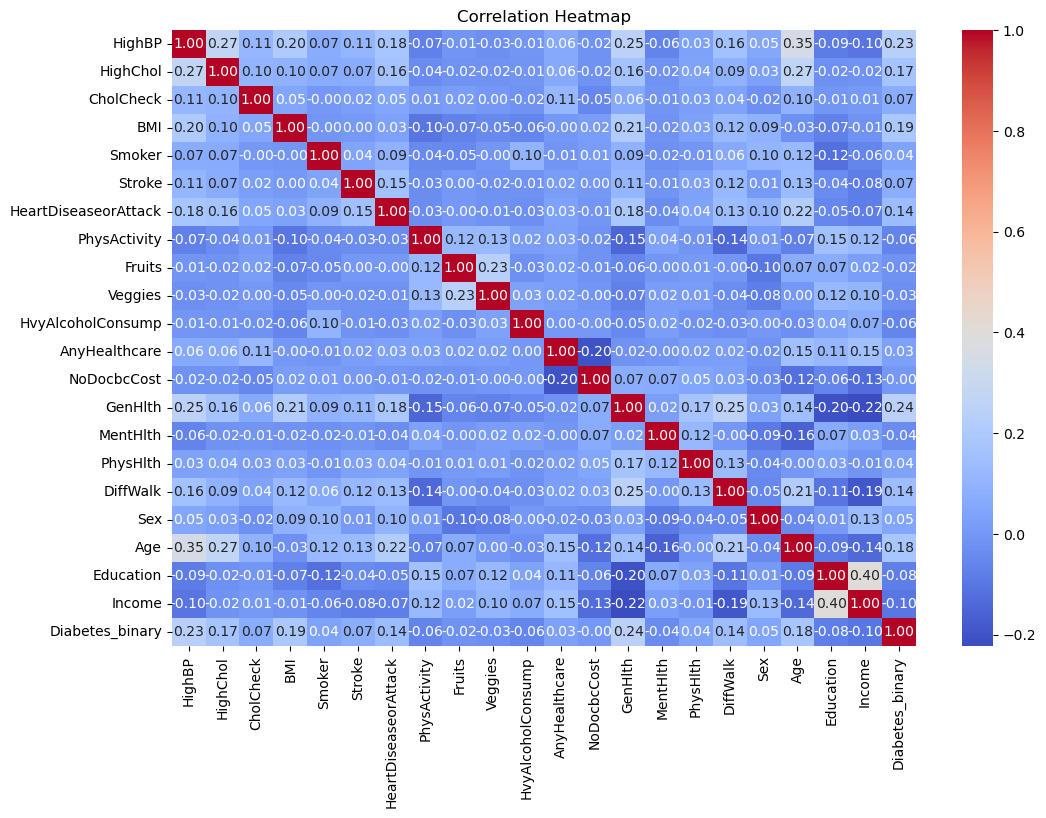

In [11]:
# Heatmap to show correlation
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Defining Features and Target
X = df_encoded.drop(columns=["Diabetes_binary"])
y = df_encoded["Diabetes_binary"]



In [14]:
# Handling Class Imbalance
rus = RandomUnderSampler(sampling_strategy={0: 20099, 1: 20099}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [15]:
# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [16]:
# Standardizing the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training Logistic Regression...
Accuracy: 0.7291
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      4021
           1       0.72      0.75      0.74      4019

    accuracy                           0.73      8040
   macro avg       0.73      0.73      0.73      8040
weighted avg       0.73      0.73      0.73      8040



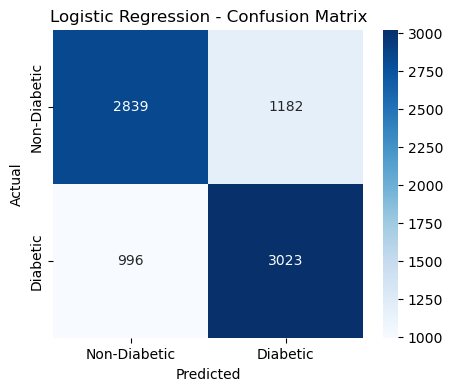

Training Decision Tree...
Accuracy: 0.6240
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62      4021
           1       0.62      0.62      0.62      4019

    accuracy                           0.62      8040
   macro avg       0.62      0.62      0.62      8040
weighted avg       0.62      0.62      0.62      8040



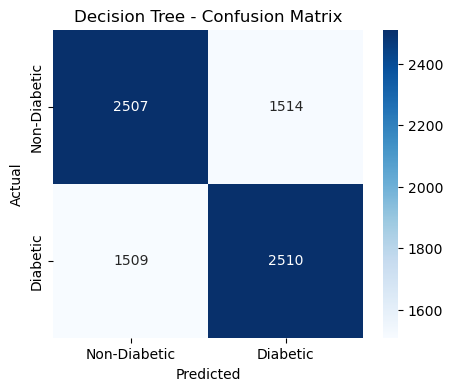

Training Random Forest...
Accuracy: 0.7095
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      4021
           1       0.70      0.74      0.72      4019

    accuracy                           0.71      8040
   macro avg       0.71      0.71      0.71      8040
weighted avg       0.71      0.71      0.71      8040



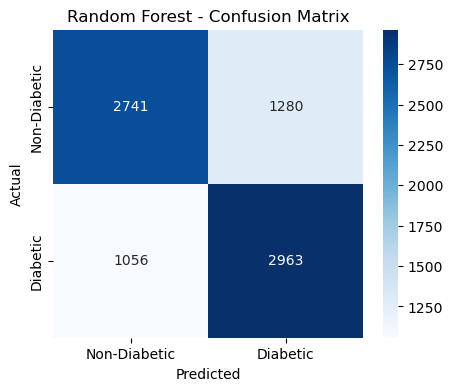

Training Gradient Boosting...
Accuracy: 0.7297
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      4021
           1       0.71      0.77      0.74      4019

    accuracy                           0.73      8040
   macro avg       0.73      0.73      0.73      8040
weighted avg       0.73      0.73      0.73      8040



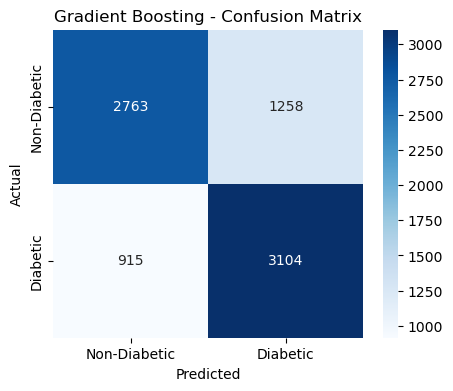

Training SVM...
Accuracy: 0.7277
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71      4021
           1       0.71      0.78      0.74      4019

    accuracy                           0.73      8040
   macro avg       0.73      0.73      0.73      8040
weighted avg       0.73      0.73      0.73      8040



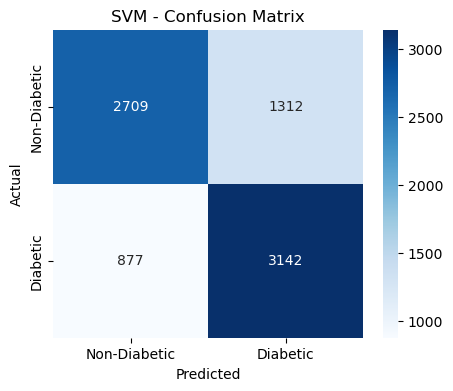

Training KNN...
Accuracy: 0.6786
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67      4021
           1       0.67      0.70      0.69      4019

    accuracy                           0.68      8040
   macro avg       0.68      0.68      0.68      8040
weighted avg       0.68      0.68      0.68      8040



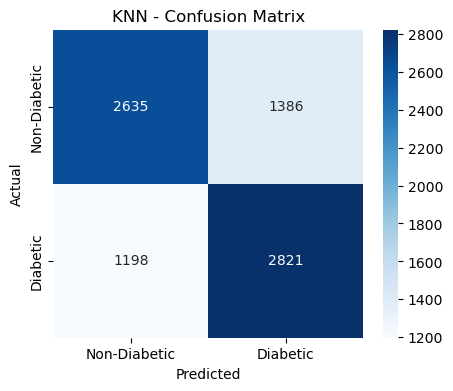

In [17]:
# Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [18]:
# Model Comparison
best_model = max(results, key=results.get)
print(f"Best Performing Model: {best_model} with Accuracy: {results[best_model]:.4f}")

Best Performing Model: Gradient Boosting with Accuracy: 0.7297


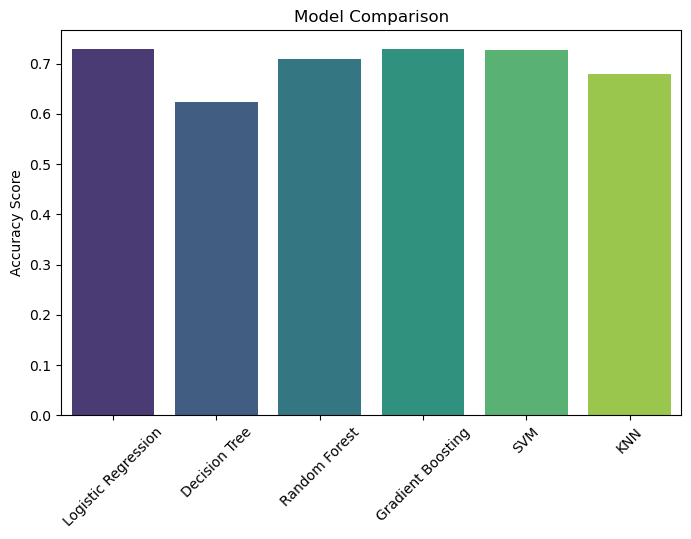

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()



In [20]:
# Display Sample Predictions
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': models[best_model].predict(X_test)})
print("Sample Predictions:")
print(comparison_df.sample(10))


Sample Predictions:
      Actual  Predicted
589        1          1
8003       0          0
1086       1          1
2865       1          0
7192       0          1
4440       1          1
2574       0          0
5312       1          1
7069       1          1
4166       1          1
